In [1]:
#Importing neccessary Libraries
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#uploading Kaggle.json ,it has username and key
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gaddevenugopal","key":"ca7038a1d5ecca298adb7fe0bcfdebaa"}'}

In [3]:
#Connecting kaggle to Google Colab
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [4]:
#Dowloading dataset from kaggle
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 98% 561M/572M [00:05<00:00, 88.6MB/s]
100% 572M/572M [00:05<00:00, 105MB/s] 


In [5]:
#Unziping folder
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [6]:
#Getting data from different directories
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.


In [7]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [8]:
#Random image plotting function
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['person956_virus_1628.jpeg']
image shape (816, 1320)


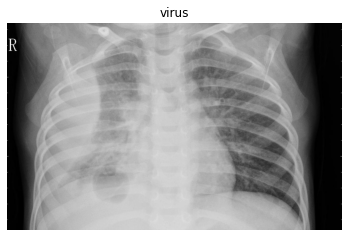

In [9]:
img = view_image("/content/COVID_IEEE/","virus")

['NORMAL2-IM-0587-0001-0001.jpeg']
image shape (2540, 2428)


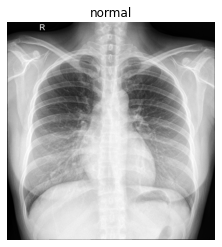

In [10]:
img = view_image("/content/COVID_IEEE/","normal")

['covid1900333.png']
image shape (480, 640, 3)


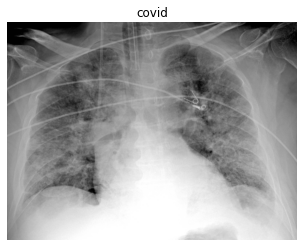

In [11]:
img = view_image("/content/COVID_IEEE/","covid")

In [12]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [13]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [14]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))
    

    data.append(image)
    labels.append(2)

In [15]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [16]:
data

array([[[[0.20784314, 0.20784314, 0.20784314],
         [0.22352941, 0.22352941, 0.22352941],
         [0.27058824, 0.27058824, 0.27058824],
         ...,
         [0.18039216, 0.18039216, 0.18039216],
         [0.14901961, 0.14901961, 0.14901961],
         [0.14117647, 0.14117647, 0.14117647]],

        [[0.1372549 , 0.1372549 , 0.1372549 ],
         [0.14509804, 0.14509804, 0.14509804],
         [0.15686275, 0.15686275, 0.15686275],
         ...,
         [0.2       , 0.2       , 0.2       ],
         [0.16470588, 0.16470588, 0.16470588],
         [0.14901961, 0.14901961, 0.14901961]],

        [[0.09019608, 0.09019608, 0.09019608],
         [0.10588235, 0.10588235, 0.10588235],
         [0.09019608, 0.09019608, 0.09019608],
         ...,
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.12941176, 0.12941176, 0.12941176],
         [0.10588235, 0.10588235, 0.10588235]],

        ...,

        [[0.11764706, 0.11764706, 0.11764706],
         [0.13333333, 0.13333333, 0.13333333]

In [17]:
img_labels


array([0, 0, 0, ..., 2, 2, 2])

In [18]:
#Splitting the data in to Train and test
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [19]:
#Building a deep learning model 
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 112, 112, 64)      0

In [21]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 42s 249ms/step - loss: 0.8709 - accuracy: 0.6127 - val_loss: 0.6735 - val_accuracy: 0.7694
Epoch 2/15
32/32 [==============================] - 4s 126ms/step - loss: 0.4320 - accuracy: 0.8500 - val_loss: 0.3005 - val_accuracy: 0.8881
Epoch 3/15
32/32 [==============================] - 4s 127ms/step - loss: 0.2459 - accuracy: 0.9049 - val_loss: 0.2234 - val_accuracy: 0.9315
Epoch 4/15
32/32 [==============================] - 4s 127ms/step - loss: 0.2137 - accuracy: 0.9245 - val_loss: 0.2286 - val_accuracy: 0.9132
Epoch 5/15
32/32 [==============================] - 4s 128ms/step - loss: 0.1735 - accuracy: 0.9353 - val_loss: 0.1755 - val_accuracy: 0.9406
Epoch 6/15
32/32 [==============================] - 4s 128ms/step - loss: 0.1136 - accuracy: 0.9539 - val_loss: 0.2166 - val_accuracy: 0.9361
Epoch 7/15
32/32 [==============================] - 4s 129ms/step - loss: 0.1166 - accuracy: 0.9647 - val_loss: 0.2023 - val_accuracy: 0.9384
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

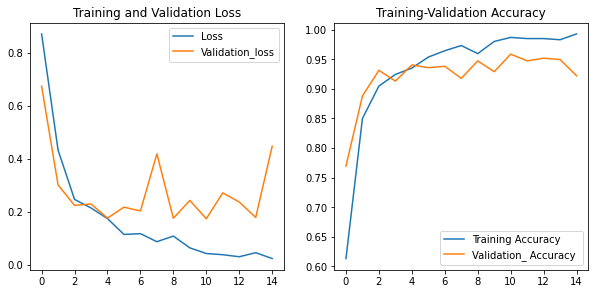

In [22]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [23]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [24]:
# Different evaluation metrics
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       108
           1       0.97      0.91      0.94       129
           2       0.95      0.94      0.94       128

    accuracy                           0.95       365
   macro avg       0.94      0.95      0.95       365
weighted avg       0.95      0.95      0.95       365



In [25]:
#Confusion Matrix
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,108,0,0
normal,6,117,6
virus,5,3,120


In [26]:
#Transfer Learning
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17235968/17225924 [==============================] - 0s 0us/step


In [27]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [28]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [30]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 5s 106ms/step - loss: 10.8364 - accuracy: 0.7578 - val_loss: 1.1550 - val_accuracy: 0.9475
Epoch 2/15
32/32 [==============================] - 2s 64ms/step - loss: 0.7400 - accuracy: 0.9431 - val_loss: 0.3743 - val_accuracy: 0.9635
Epoch 3/15
32/32 [==============================] - 2s 63ms/step - loss: 0.2828 - accuracy: 0.9725 - val_loss: 0.6220 - val_accuracy: 0.9612
Epoch 4/15
32/32 [==============================] - 2s 64ms/step - loss: 0.1250 - accuracy: 0.9873 - val_loss: 0.4701 - val_accuracy: 0.9498
Epoch 5/15
32/32 [==============================] - 2s 63ms/step - loss: 0.1294 - accuracy: 0.9843 - val_loss: 0.8307 - val_accuracy: 0.9338
Epoch 6/15
32/32 [==============================] - 2s 64ms/step - loss: 0.3620 - accuracy: 0.9667 - val_loss: 0.6457 - val_accuracy: 0.9498
Epoch 7/15
32/32 [==============================] - 2s 64ms/step - loss: 0.1113 - accuracy: 0.9873 - val_loss: 0.5015 - val_accuracy: 0.9566
Epoch 8/15


Text(0.5, 1.0, 'Training-Validation Accuracy')

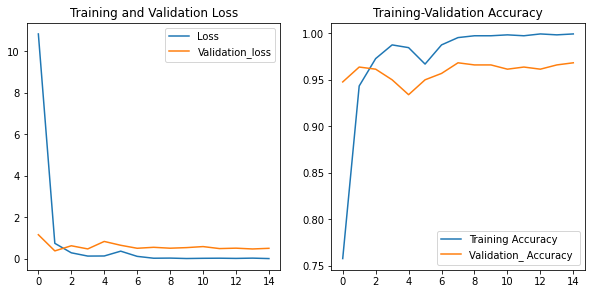

In [31]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [32]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [33]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,105,3,0
normal,0,127,2
virus,1,5,122
